# Visualisations of the chatgpt evaluation

In [5]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
# Load data
input_dir = Path.cwd() / '../data/csv_files' # input directory
df = pd.read_csv(input_dir /'gpt_evaluatio_chunks_with_keywords_sum_added.csv')

## Visualise the relativ frequency trend line

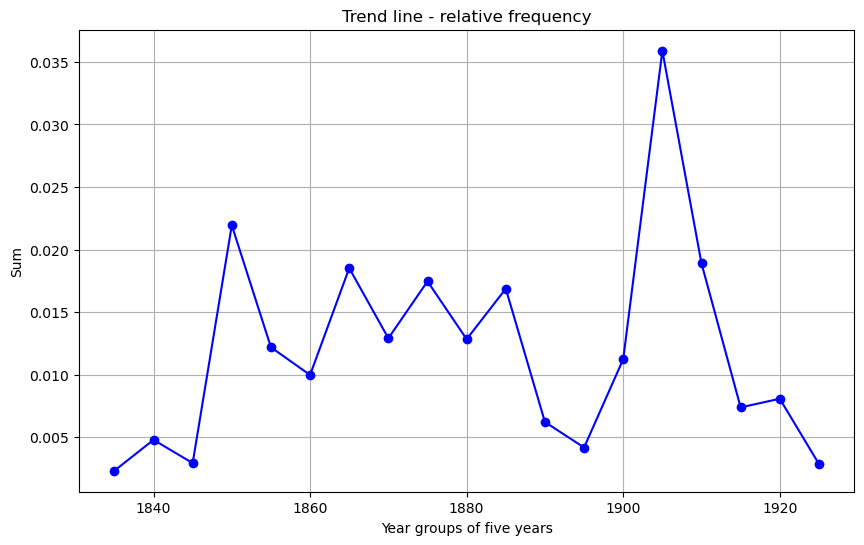

In [24]:
# Group 'year' column in groups of five years
df['year_group'] = (df['year'] // 5) * 5

# Count how many rows go into each year group
year_group_counts = df.groupby('year_group').size()

# Sum the 'sum' column for each year group
year_group_sums = df.groupby('year_group')['sum'].sum()

# Divide the sum by the counts of each year in year group
result = year_group_sums / year_group_counts 

# Combine the results into a final dataframe
final_df = pd.DataFrame({
    'count': year_group_counts,
    'sum': year_group_sums,
    'sum/count': result}).reset_index()

#final_df

# Plotting the line chart with points
plt.figure(figsize=(10, 6))
plt.plot(final_df['year_group'], final_df['sum/count'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Trend line - relative frequency')
plt.xlabel('Year groups of five years')
plt.ylabel('Sum')

# Display the plot
plt.grid(True)

# Save the plot as an image file in a specified directory
output_path = r'C:\Users\lakj\Documents\GitHub\Light_in_French_Literature\visualisations\Trend_line_relative_frequency_plot.png'
plt.savefig(output_path)


plt.show()

## Visualise the raw frequency trend line

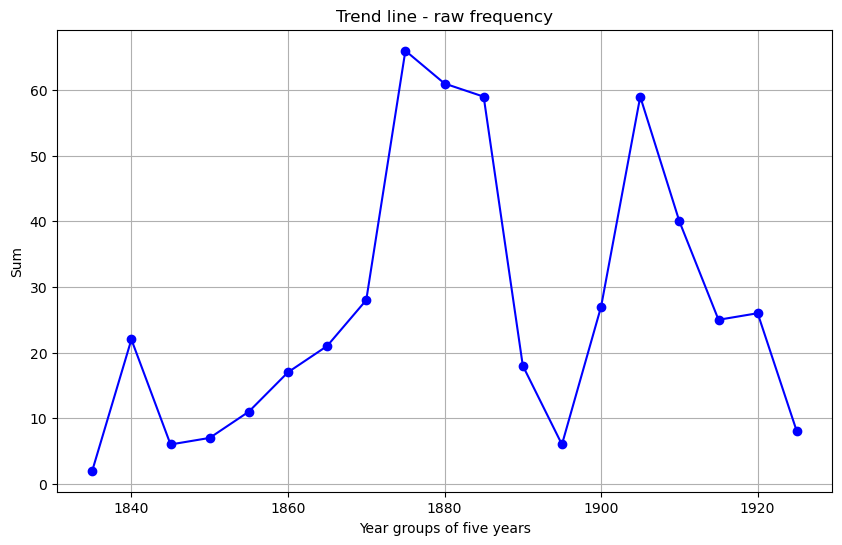

In [25]:
# Use the split-join-combine approach to group the 'year' column in groups of five years and sum the values in the 'sum' column.

# Create a new column for 5-year groups
df['year_group'] = (df['year'] // 5) * 5

# Group by the new column and sum the 'sum' column
result = df.groupby('year_group')['sum'].sum().reset_index()

#result

# Plotting the line chart with points
plt.figure(figsize=(10, 6))
plt.plot(result['year_group'], result['sum'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Trend line - raw frequency')
plt.xlabel('Year groups of five years')
plt.ylabel('Sum')

# Display the plot
plt.grid(True)

# Save the plot as an image file in a specified directory
output_path = r'C:\Users\lakj\Documents\GitHub\Light_in_French_Literature\visualisations\Trend_line_raw_frequency_plot.png'
plt.savefig(output_path)


plt.show()

## Calculating the trends of different titles

In [12]:
# Load data
input_dir = Path.cwd() / '../data/csv_files' # input directory
df = pd.read_csv(input_dir /'gpt_evaluatio_chunks_with_keywords_sum_added.csv')

### begin with the trend line of one book - raw frequency

Let's calculate the raw frequency of where in a novel the use of illumination by artificial lighting evokes feelings of love or romance between people.

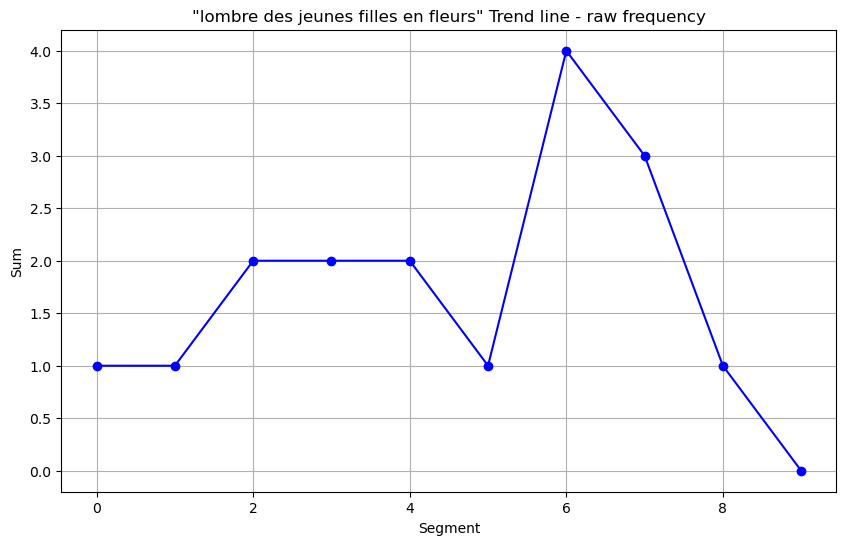

In [27]:
# Filter the dataframe for the specific book title

book_title = 'lombre des jeunes filles en fleurs'

df_book = df[df['title'] == book_title].copy()

# Ensure the dataframe has a default index if 'index' column is not present
if 'index' not in df_book.columns:
    df_book.reset_index(inplace=True)

# Determine the size of each segment
num_segments = 10
segment_size = len(df_book) // num_segments

# Create a new column to identify the segment each row belongs to
df_book['segment'] = (df_book.index) // segment_size

# Handle any remaining rows
# If the number of rows is not perfectly divisible by 10, the last segment might have fewer rows.
# Ensure that all rows are included:
df_book['segment'] = df_book['segment'].clip(upper=num_segments - 1)

# Group by the 'segment' column and aggregate the 'sum' column
result = df_book.groupby('segment')['sum'].sum().reset_index()


# Visualise
import matplotlib.pyplot as plt

# Plotting the line chart with points
plt.figure(figsize=(10, 6))
plt.plot(result['segment'], result['sum'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title(f'"{book_title}" Trend line - raw frequency')
plt.xlabel('Segment')
plt.ylabel('Sum')

# Display the plot
plt.grid(True)

# Save the plot as an image file in a specified directory
output_path = r'C:\Users\lakj\Documents\GitHub\Light_in_French_Literature\visualisations\lombre_des_jeunes_filles_en_fleurs_trend_line_raw_frequency_plot.png'
plt.savefig(output_path)


plt.show()

# the trend line of one book - relative frequency

Calculate the relative frequency of where in a novel the use of illumination by artificial lighting evokes feelings of love or romance between people.


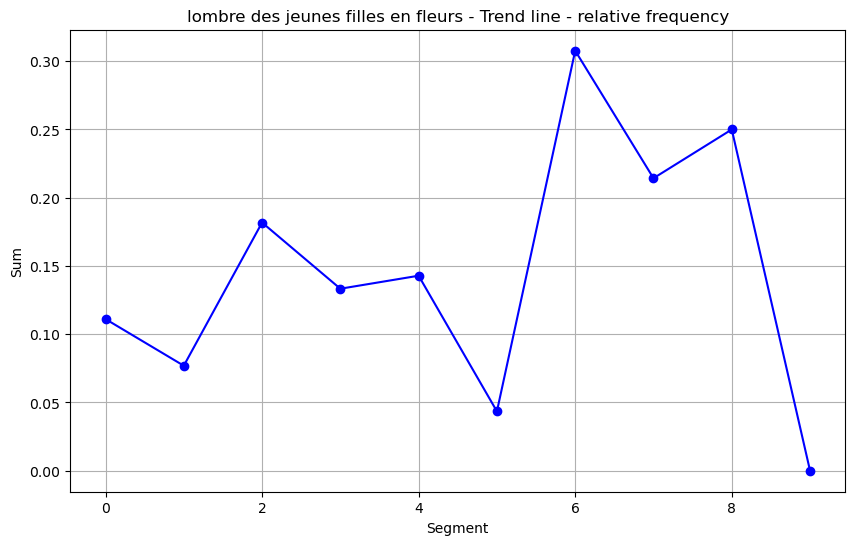

In [28]:
import warnings
warnings.filterwarnings('ignore')

book_title = 'lombre des jeunes filles en fleurs'

# Filter the dataframe for the specific book title
df_book = df[df['title'] == book_title].copy()

# Ensure the dataframe has a default index if 'index' column is not present
if 'index' not in df_book.columns:
    df_book.reset_index(inplace=True)

# Determine the size of each segment
num_segments = 10
segment_size = len(df_book) // num_segments

# Create a new column to identify the segment each row belongs to
df_book['segment'] = (df_book.index) // segment_size

# Handle any remaining rows
# If the number of rows is not perfectly divisible by 10, the last segment might have fewer rows.
# Ensure that all rows are included:
df_book['segment'] = df_book['segment'].clip(upper=num_segments - 1)

# Group by the 'segment' column and calculate the mean of the 'sum' column
result = df_book.groupby('segment')['sum'].mean().reset_index()


# Plotting the line chart with points
plt.figure(figsize=(10, 6))
plt.plot(result['segment'], result['sum'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title(f'{book_title} - Trend line - relative frequency')
plt.xlabel('Segment')
plt.ylabel('Sum')

# Display the plot
plt.grid(True)

# Save the plot as an image file in a specified directory
output_path = r'C:\Users\lakj\Documents\GitHub\Light_in_French_Literature\visualisations\lombre_des_jeunes_filles_en_fleurs_trend_line_relativ_frequency_plot.png'
plt.savefig(output_path)


plt.show()


plt.show()


## Calculating the mean trend of different authorships

In [35]:
## Calculating the mean trend of different authorships

import warnings
warnings.filterwarnings('ignore')
import pandas as pd

df_book1 = df.copy()

# Function to segment and aggregate within each group
def segment_and_aggregate(group):
    num_segments = 10
    segment_size = len(group) // num_segments
    
    # Create a new column to identify the segment each row belongs to
    group = group.reset_index(drop=True)
    group['segment'] = (group.index) // segment_size
    
    # Handle any remaining rows
    group['segment'] = group['segment'].clip(upper=num_segments - 1)
    
    # Group by the 'segment' column and calculate the mean of the 'sum' column
    return group.groupby('segment')['sum'].mean().reset_index()

# Group by 'author' and 'title', then apply the segmentation and aggregation
result = df_book1.groupby(['author', 'title']).apply(segment_and_aggregate).reset_index()

# Drop the extra level column added by groupby
result = result.drop(columns=['level_2'])

# result

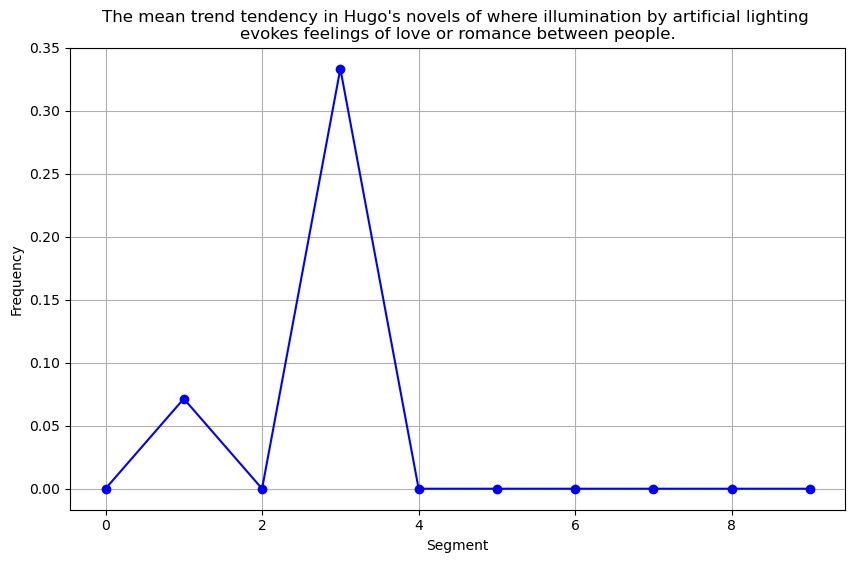

In [38]:
author = 'Hugo'
mean_result = result[result['author']==author].groupby('segment')['sum'].mean().reset_index()

data = mean_result

# Visualise
import matplotlib.pyplot as plt

# Plotting the line chart with points
plt.figure(figsize=(10, 6))
plt.plot(data['segment'], data['sum'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title(f"The mean trend tendency in {author}'s novels of where illumination by artificial lighting \n\
evokes feelings of love or romance between people.")
plt.xlabel('Segment')
plt.ylabel('Frequency')

# Display the plot
plt.grid(True)

# Save the plot as an image file in a specified directory
output_path = r'C:\Users\lakj\Documents\GitHub\Light_in_French_Literature\visualisations\mean_trend_tendency_in_hugos_novels_plot.png'
plt.savefig(output_path)

plt.show()

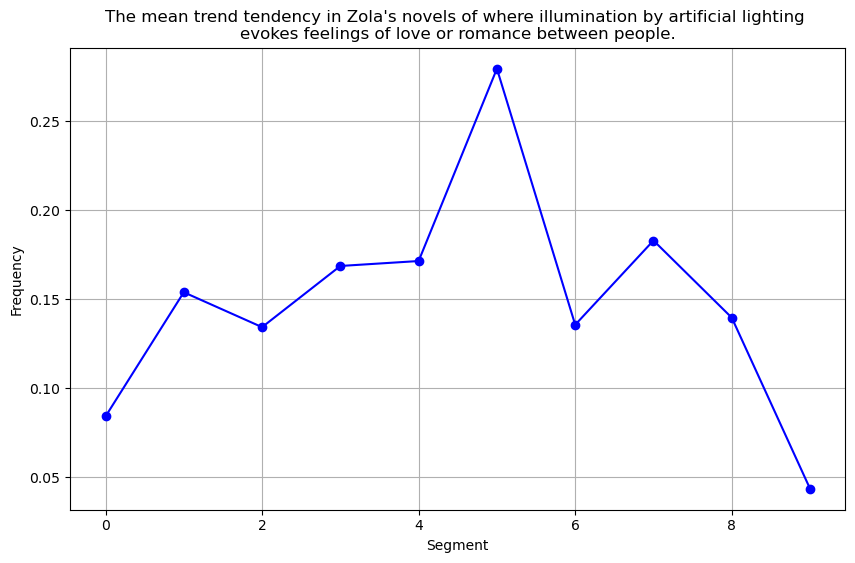

In [39]:
author = 'Zola'
mean_result = result[result['author']==author].groupby('segment')['sum'].mean().reset_index()

data = mean_result

# Visualise
import matplotlib.pyplot as plt

# Plotting the line chart with points
plt.figure(figsize=(10, 6))
plt.plot(data['segment'], data['sum'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title(f"The mean trend tendency in {author}'s novels of where illumination by artificial lighting \n\
evokes feelings of love or romance between people.")
plt.xlabel('Segment')
plt.ylabel('Frequency')

# Display the plot
plt.grid(True)

# Save the plot as an image file in a specified directory
output_path = r'C:\Users\lakj\Documents\GitHub\Light_in_French_Literature\visualisations\mean_trend_tendency_in_zolas_novels_plot.png'
plt.savefig(output_path)

plt.show()